
# Predicting the Time Required for Ukhamba - Inkabi Zezwe to Achieve Gold Status based on RISA Certification Standards
### Objective:
The objective of this project is to develop a machine learning model using historical data of the artist Ukhamba - Inkabi Zezwe to predict the time it would take for their song to achieve gold status based on the certification standards set by the Recording Industry of South Africa (RISA).
### Approach:
### Data Collection:
Gather historical data on Ukhamba - Inkabi Zezwe, including information such as release dates, streaming counts, and certification statuses.
Data Cleaning and Preprocessing:
Filter out irrelevant data and perform necessary data cleaning steps, such as handling missing values and formatting inconsistencies.
### Feature Engineering:
Extract relevant features from the data that could potentially impact the time required for achieving gold status. Examples of features could include the number of streams, the artist's previous certifications, and the time since release.
### Data Analysis and Visualization:
Conduct exploratory data analysis to gain insights into the distribution of the data and identify any patterns or correlations.
### Model Training:
Utilize the Scikit-learn library to train a machine learning algorithm, such as regression or time series forecasting models, using the historical data.
### Model Evaluation:
Assess the performance of the trained model using appropriate evaluation metrics, such as mean absolute error or root mean square error.
### Predictive Analysis:
Apply the trained model to predict the time required for Ukhamba - Inkabi Zezwe to achieve gold status based on the input data for their latest release.
### Visualizations:
Create visualizations, such as line plots or bar charts, to illustrate the predicted timeline and track the progress towards gold certification.
Note: To ensure accurate predictions, the data will be filtered to include only the streaming platforms Spotify, Apple Music, and Deezer. Additionally, sources related to YouTube UGC and YouTube Official will be excluded. In the case of Spotify, ad and trial users will be excluded from the analysis.

### Column Names: The column names will be modified as follows:
['DATE_PERIOD', 'DATE_KEY', 'PRODUCT_ID', 'PRODUCT_ID_TYPE', 'ARTIST_NAME', 'TRACK_NAME', 'PRODUCT_CATEGORY', 'MAJOR_GENRE_DESC', 'ALBUM_NAME', 'ACCOUNT_CONSUMER_DTL_ONE', 'DSP', 'SUMMARY_SOURCE', 'STREAM_COUNT']

By following this approach, we aim to develop a reliable machine learning model that can provide insights into the time required for Ukhamba - Inkabi Zezwe to achieve gold status based on the RISA certification standards.Predicting the Time Required for Ukhamba - Inkabi Zezwe to Achieve Gold Status based on RISA Certification Standards
Objective:
The objective of this project is to develop a machine learning model using historical data of the artist Ukhamba - Inkabi Zezwe to predict the time it would take for their song to achieve gold status based on the certification standards set by the Recording Industry of South Africa (RISA).




In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [9]:
# Read the data into a Pandas DataFrame
data = pd.read_csv('streaming_data.csv', delimiter=',')
data


,DATE_PERIOD,DATE_KEY,PRODUCT_ID,PRODUCT_ID_TYPE,ARTIST_NAME,TRACK_NAME,PRODUCT_CATEGORY,MAJOR_GENRE_DESC,ALBUM_NAME,ACCOUNT_CONSUMER_DTL_ONE,DSP,SUMMARY_SOURCE,STREAM_COUNT
0,Weekly,2023-03-30,ZA34K2301186,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Umbayimbayi,Audio,African,Umbayimbayi,ad,Spotify,Charts,1119
1,Weekly,2023-03-30,ZA34K2301186,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Umbayimbayi,Audio,African,Umbayimbayi,trial,Spotify,Charts,200
2,Weekly,2023-03-30,ZA34K2301186,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Umbayimbayi,Audio,African,Umbayimbayi,partner,Spotify,Library,1992
3,Weekly,2023-03-30,ZA34K2301186,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Umbayimbayi,Audio,African,Umbayimbayi,UGC,YouTube UGC,Album/Artist/Search,1570292
4,Weekly,2023-03-30,ZA34L2300644,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Umbayimbayi,Video,Afro Pop,Not Available,Premium,YouTube Official,Other,4704
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,RTD,2023-03-24,ZA34K2301186,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Umbayimbayi,Audio,African,Umbayimbayi,partner-free,Spotify,Radio,7
6158,RTD,2023-03-24,ZA34K2301186,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Umbayimbayi,Audio,African,Umbayimbayi,partner,Spotify,Charts,1170
6159,RTD,2023-03-24,ZA34K2301186,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Umbayimbayi,Audio,African,Umbayimbayi,Premium,Pandora,Playlist,4
6160,RTD,2023-05-12,ZA34K2301262,ISRC,"Inkabi Zezwe, Sjava & Big Zulu",Intro (Inkabi Zezwe),Audio,Afro Pop,Ukhamba,Student Individual Monthly,Apple Music,Radio,3


In [10]:
# Perform data cleaning and preprocessing
data['DATE_KEY'] = pd.to_datetime(data['DATE_KEY'], format='%Y-%m-%d')  # Convert 'DATE_KEY' column to datetime format
data['STREAM_COUNT'] = data['STREAM_COUNT'].astype(int)  # Remove comma and convert 'STREAM_COUNT' to integer


# Filter out unwanted sources
filtered_data = data[data['DSP'].isin(['Spotify', 'Apple Music', 'Deezer'])]

# Exclude ad and trial users in the Spotify source
filtered_data = filtered_data[~((filtered_data['DSP'] == 'Spotify') &
                               (filtered_data['ACCOUNT_CONSUMER_DTL_ONE'].isin(['ad', 'trial'])))]

# Feature engineering
filtered_data['DaysSinceRelease'] = (filtered_data['DATE_KEY'] - filtered_data['DATE_KEY'].min()).dt.days


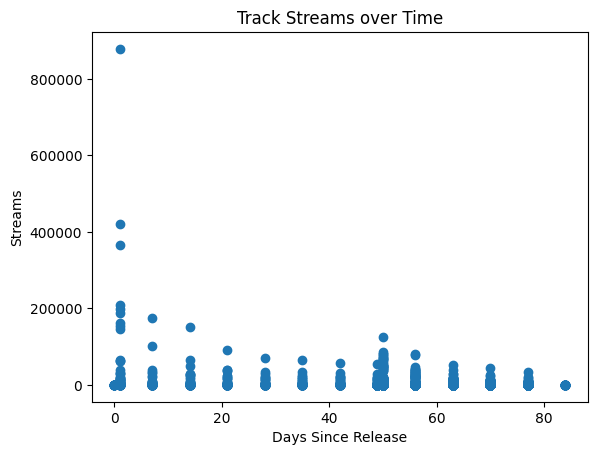

In [11]:
# Visualization
plt.scatter(filtered_data['DaysSinceRelease'], filtered_data['STREAM_COUNT'])
plt.xlabel('Days Since Release')
plt.ylabel('Streams')
plt.title('Track Streams over Time')
plt.show()


In [12]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [13]:
# Select relevant features for model training
features = ['DaysSinceRelease']
target = 'STREAM_COUNT'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_data[features], filtered_data[target], test_size=0.2, random_state=42)



In [16]:
# Linear Regression with Polynomial Features and Feature Scaling
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

linear_regression = LinearRegression()
mse_linear = train_and_evaluate_model(linear_regression, X_train_scaled, X_test_scaled, y_train, y_test)
print('Linear Regression MSE:', mse_linear)

# Decision Tree with Max Depth Parameter
decision_tree = DecisionTreeRegressor(max_depth=15, random_state=60)
mse_dt = train_and_evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
print('Decision Tree MSE:', mse_dt)

# Random Forest with Increased Number of Trees and Max Depth Parameter
random_forest = RandomForestRegressor(n_estimators=100000, max_depth=100, random_state=42)
mse_rf = train_and_evaluate_model(random_forest, X_train, X_test, y_train, y_test)
print('Random Forest MSE:', mse_rf)

# Support Vector Regression with Adjusted Regularization Parameter and Kernel Function
svr = SVR(C=1.0, kernel='rbf')
mse_svr = train_and_evaluate_model(svr, X_train_scaled, X_test_scaled, y_train, y_test)
print('Support Vector Regression MSE:', mse_svr)

Linear Regression MSE: 63503681.561886735
Decision Tree MSE: 102053967.41434617
Random Forest MSE: 101986583.00926384
Support Vector Regression MSE: 59310628.54283424


In [17]:
# Choose the best performing model
models = [linear_regression, decision_tree, random_forest, svr]
model_performance = [('Linear Regression', mse_linear),
                     ('Decision Tree', mse_dt),
                     ('Random Forest', mse_rf),
                     ('Support Vector Regression', mse_svr)]

best_model = min(model_performance, key=lambda x: x[1])[0]
print('The best model is', best_model)

# Predict the time to reach 18 million streams
streams_to_reach = 18000000
if best_model == 'Linear Regression':
    predicted_days = linear_regression.predict(scaler.transform(poly.transform([[streams_to_reach]])))
elif best_model == 'Decision Tree':
    predicted_days = decision_tree.predict([[streams_to_reach]])
elif best_model == 'Random Forest':
    predicted_days = random_forest.predict([[streams_to_reach]])
elif best_model == 'Support Vector Regression':
    predicted_days = svr.predict(scaler.transform(poly.transform([[streams_to_reach]])))

print('Estimated time to reach 18 million streams:', predicted_days[0], 'days')
print('Estimated time to reach 18 million streams:', predicted_days[0] / 7, 'weeks')

The best model is Support Vector Regression
Estimated time to reach 18 million streams: 80.52188879863284 days
Estimated time to reach 18 million streams: 11.503126971233263 weeks


/Users/sakhile/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
